# <font size=7> <font color = darkblue>"Developed a Regression -Based Predictive Model for Housing Price Estimation"¶

---

In [1]:
# IMPORTS dependencies to load the data and perform EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display

In [2]:
plt.rcParams['font.size']=12 # Running Configuration Parameters
plt.rcParams['axes.grid']=True
plt.rcParams['figure.figsize'] = (5,5)

---

In [3]:
bos = pd.read_csv('BostonHousing.csv')
bos.head()

,crime_rate,industrial_perc,close_to_charles_river,nitric_oxide,avg_num_rooms,age,dist_frm_employment_center,pupil_teacher_ratio,perc_low_income_group,avg_house_price
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,15.3,4.98,24.0
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,17.8,9.14,21.6
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,17.8,4.03,34.7
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,18.7,2.94,33.4
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,18.7,5.33,36.2


In [4]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   crime_rate                  506 non-null    float64
 1   industrial_perc             506 non-null    float64
 2   close_to_charles_river      506 non-null    int64  
 3   nitric_oxide                506 non-null    float64
 4   avg_num_rooms               506 non-null    float64
 5   age                         506 non-null    float64
 6   dist_frm_employment_center  506 non-null    float64
 7   pupil_teacher_ratio         506 non-null    float64
 8   perc_low_income_group       506 non-null    float64
 9   avg_house_price             506 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 39.7 KB


In [5]:
bos.isnull().sum()

crime_rate                    0
industrial_perc               0
close_to_charles_river        0
nitric_oxide                  0
avg_num_rooms                 0
age                           0
dist_frm_employment_center    0
pupil_teacher_ratio           0
perc_low_income_group         0
avg_house_price               0
dtype: int64

In [6]:
bos.duplicated().sum()

0

### From the above information we can observe that,
#### (a) There are 506 Rows
#### (b) 10 columns
#### (c) All 10 columns are number columns
#### (d) There is no null values present in the data set
#### (e) There is no duplicate records found

### The data set seems to be cleaned to perform EDA

In [7]:
round(bos.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
crime_rate,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
industrial_perc,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
close_to_charles_river,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
nitric_oxide,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
avg_num_rooms,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
age,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
dist_frm_employment_center,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
pupil_teacher_ratio,506.0,18.46,2.16,12.60,17.40,19.05,20.20,22.00
perc_low_income_group,506.0,12.65,7.14,1.73,6.95,11.36,16.96,37.97
avg_house_price,506.0,22.53,9.20,5.00,17.02,21.20,25.00,50.00


In [8]:
bos.columns

Index(['crime_rate', 'industrial_perc', 'close_to_charles_river',
       'nitric_oxide', 'avg_num_rooms', 'age', 'dist_frm_employment_center',
       'pupil_teacher_ratio', 'perc_low_income_group', 'avg_house_price'],
      dtype='object')

<AxesSubplot:xlabel='avg_house_price'>

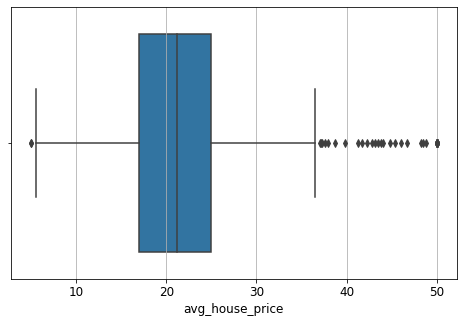

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(x='avg_house_price', data=bos)

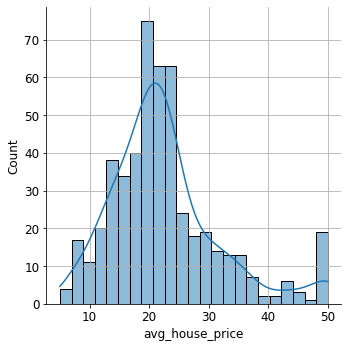

In [10]:
sns.displot(x='avg_house_price', data=bos, kde = True)

### Check correlation between Target Variable - "avg_house_price" with independent varibles

In [11]:
bos.corrwith(bos.avg_house_price)

crime_rate                   -0.388305
industrial_perc              -0.483725
close_to_charles_river        0.175260
nitric_oxide                 -0.427321
avg_num_rooms                 0.695360
age                          -0.376955
dist_frm_employment_center    0.249929
pupil_teacher_ratio          -0.507787
perc_low_income_group        -0.737663
avg_house_price               1.000000
dtype: float64

### From the above figures we can conclude that
#### (a) The variable "perc_low_income_group" having strong correlation with target variable i.e., -0.737, which is negetive correlation.
#### (b) The variable "avg_num_rooms" having 2nd highest correlation with target variable i.e., 0.695, which is positive correlation.

### With this we can conclude that, if high value in per_low_income_group will descreses the avg_house_price and if avg_num_rooms increase will leade to increase in avg_house_price value.

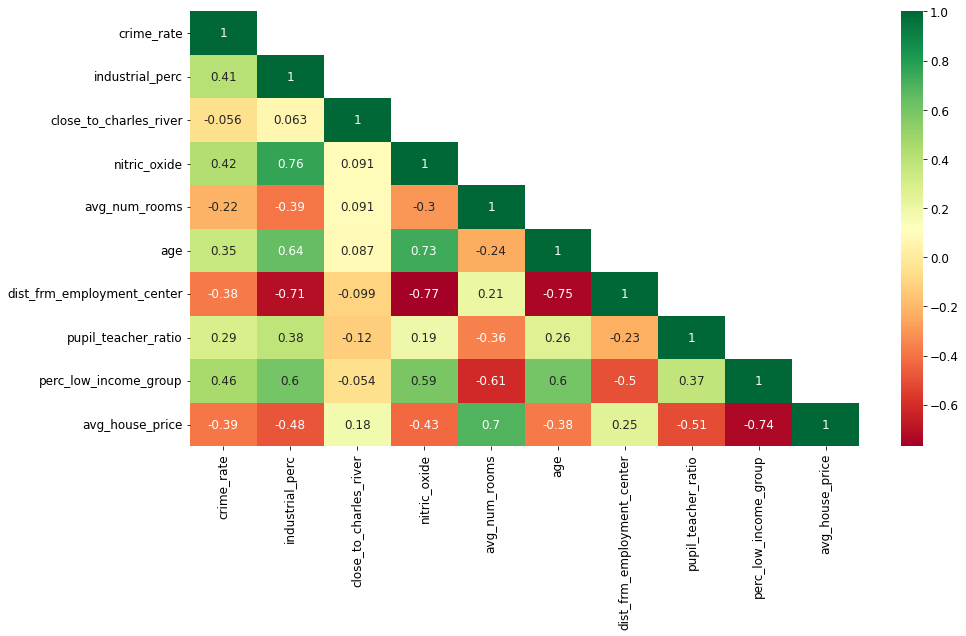

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(bos.corr(), annot=True, mask=np.triu(bos.corr(),1), cmap = 'RdYlGn')
plt.show()

### From the above heat map we can note that, there is a correlation between independent variables and which may lead to multicollinearity.


---

### Model Building
#### Since the target variable "avg_house_price" is contineous numeric value we will chose Linear regression supervised machine learning model.

### Multi Linear Regression which will work on the following algorithmn
# \begin{equation*}y =   m_1x_1 + m_2x_2 + m_3x_3 +.... + m_nx_n + c + error \end{equation*}

### Linear Regreesion Model on Descriptive Approach

In [13]:
# IMPORT Dependencies for model building
import statsmodels.formula.api as SM

### Feature Engineering

### Check for Multicollinearity using VIF formula

In [14]:
def vif_cal(input_data):
    '''
    input_data: Dataframe of features
    '''
    x_vars = input_data
    xvar_names = input_data.columns
    for i in range(len(xvar_names)):
        y = x_vars[xvar_names[i]] 
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif = round(1/(1-rsq), 2)
        print (xvar_names[i], " VIF = " , vif)

In [15]:
vif_cal(input_data= bos.drop('avg_house_price', axis=1))

crime_rate  VIF =  1.38
industrial_perc  VIF =  3.16
close_to_charles_river  VIF =  1.05
nitric_oxide  VIF =  3.83
avg_num_rooms  VIF =  1.79
age  VIF =  3.01
dist_frm_employment_center  VIF =  3.25
pupil_teacher_ratio  VIF =  1.38
perc_low_income_group  VIF =  2.85


### After implimenting VIF technique to check multicollinearity all values of the independent variables are below 5, hence, we may conclude that there may not be multicollinearity between independent varibles.

#### Model1 with all variables

In [16]:
formula_MLR1 ='avg_house_price~crime_rate+industrial_perc+close_to_charles_river+nitric_oxide+avg_num_rooms+age+dist_frm_employment_center+pupil_teacher_ratio+perc_low_income_group'

In [17]:
model1 = SM.ols(formula = formula_MLR1, data=bos).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        avg_house_price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     141.1
Date:                Thu, 13 Mar 2025   Prob (F-statistic):          1.09e-130
Time:                        08:16:21   Log-Likelihood:                -1518.9
No. Observations:                 506   AIC:                             3058.
Df Residuals:                     496   BIC:                             3100.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     34.7144      4.633      7.492      0.000      25.611      43.818
crime_rate                    -0.0659      0.030     -2.203      0.028      -0.125      -0.007
industrial_perc               -0.0568      0.057     -1.000      0.318      -0.168       0.055
close_to_charles_river         3.1947      0.885      3.610      0.000       1.456       4.933
nitric_oxide                 -15.8670      3.695     -4.294      0.000     -23.126      -8.608
avg_num_rooms                  4.1799      0.416     10.036      0.000       3.362       4.998
age                           -0.0064      0.013     -0.475      0.635      -0.033       0.020
dist_frm_employment_center    -1.2439      0.187     -6.637      0.000      -1.612      -0.876
pupil_teacher_ratio           -0.9269      0.119     -7.816      0.000      -1.160      -0.694
perc_low_income_group         -0.5322      0.052    -10.289      0.000      -0.634      -0.431
==============================================================================
Omnibus:                      192.569   Durbin-Watson:                   1.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              936.024
Skew:                           1.623   Prob(JB):                    5.56e-204
Kurtosis:                       8.819   Cond. No.                     1.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### From the above summary we can observe that,
#### (a) Adj $R^2$ value is 0.715
#### (a) The coefficient value for nigtric_oxide is the highest i.e., -15.86
#### (b) P value for age column is 0.635, which is greater than 0.05, It means the variable age is not statistically significant. Hence the column may be drop from the model.

### Model 2. Drop "Age"

In [18]:
formula_MLR2 ='avg_house_price~crime_rate+industrial_perc+close_to_charles_river+nitric_oxide+avg_num_rooms+dist_frm_employment_center+pupil_teacher_ratio+perc_low_income_group'

In [19]:
model2 = SM.ols(formula = formula_MLR2, data=bos).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        avg_house_price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     159.0
Date:                Thu, 13 Mar 2025   Prob (F-statistic):          9.32e-132
Time:                        08:16:22   Log-Likelihood:                -1519.0
No. Observations:                 506   AIC:                             3056.
Df Residuals:                     497   BIC:                             3094.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     34.7872      4.627      7.518      0.000      25.696      43.879
crime_rate                    -0.0649      0.030     -2.175      0.030      -0.123      -0.006
industrial_perc               -0.0567      0.057     -1.001      0.317      -0.168       0.055
close_to_charles_river         3.1728      0.883      3.593      0.000       1.438       4.908
nitric_oxide                 -16.3014      3.577     -4.557      0.000     -23.330      -9.273
avg_num_rooms                  4.1465      0.410     10.109      0.000       3.341       4.952
dist_frm_employment_center    -1.2093      0.173     -7.007      0.000      -1.548      -0.870
pupil_teacher_ratio           -0.9319      0.118     -7.896      0.000      -1.164      -0.700
perc_low_income_group         -0.5403      0.049    -11.064      0.000      -0.636      -0.444
==============================================================================
Omnibus:                      190.287   Durbin-Watson:                   1.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              906.399
Skew:                           1.608   Prob(JB):                    1.51e-197
Kurtosis:                       8.714   Cond. No.                         643.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### From the above summary we can observe that,
#### (a) Adj $R^2$ value is 0.715
#### (a) The coefficient value for nigtric_oxide has improved to -16.30.
#### (b) P value for "industrial_perc" column is 0.317, which is greater than 0.05, It means the variable is not statistically significant. Hence the column may be drop from the model.

### Model 3  Drop "industrial_perc"

In [20]:
formula_MLR3 ='avg_house_price~crime_rate+close_to_charles_river+nitric_oxide+avg_num_rooms+dist_frm_employment_center+pupil_teacher_ratio+perc_low_income_group'

In [21]:
model3 = SM.ols(formula = formula_MLR3, data=bos).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        avg_house_price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     181.6
Date:                Thu, 13 Mar 2025   Prob (F-statistic):          1.10e-132
Time:                        08:16:22   Log-Likelihood:                -1519.5
No. Observations:                 506   AIC:                             3055.
Df Residuals:                     498   BIC:                             3089.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     35.1688      4.611      7.626      0.000      26.108      44.229
crime_rate                    -0.0654      0.030     -2.195      0.029      -0.124      -0.007
close_to_charles_river         3.1238      0.882      3.543      0.000       1.392       4.856
nitric_oxide                 -17.8133      3.243     -5.493      0.000     -24.184     -11.442
avg_num_rooms                  4.1943      0.407     10.295      0.000       3.394       4.995
dist_frm_employment_center    -1.1631      0.166     -6.994      0.000      -1.490      -0.836
pupil_teacher_ratio           -0.9635      0.114     -8.472      0.000      -1.187      -0.740
perc_low_income_group         -0.5452      0.049    -11.223      0.000      -0.641      -0.450
==============================================================================
Omnibus:                      188.076   Durbin-Watson:                   1.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              879.882
Skew:                           1.594   Prob(JB):                    8.63e-192
Kurtosis:                       8.619   Cond. No.                         564.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### From the above summary we can observe that,
#### (a) Adj $R^2$ value is 0.715
#### (b) The coefficient value for "nitric_oxide" has again improved to -17.81.
#### (c) The coefficient value for "avg_num_rooms" is 4.19
#### (d) The coefficient value for "close_to_charles_river" is 3.128
#### (e) P value for all independent variables are below 0.05. It means all variable from Model3 are statistically significant.

In [22]:
model_MLR_2_pred = model2.fittedvalues
model_MLR_3_pred = model3.fittedvalues
model_MLR_3_pred

0      30.948872
1      25.833746
2      31.824281
3      29.689071
4      29.008530
         ...    
501    24.222415
502    22.783598
503    28.388031
504    26.905987
505    22.807279
Length: 506, dtype: float64

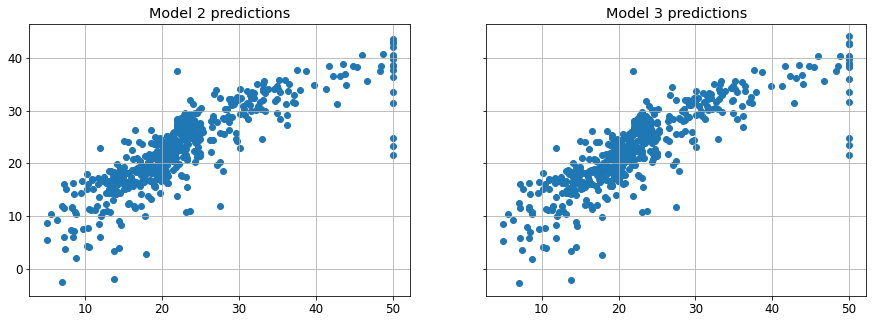

In [23]:
f, (ax1, ax2) =  plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True)

ax1.scatter(bos['avg_house_price'], model_MLR_2_pred)
ax1.set_title('Model 2 predictions')

ax2.scatter(bos['avg_house_price'],model_MLR_3_pred)
ax2.set_title('Model 3 predictions')
plt.show()

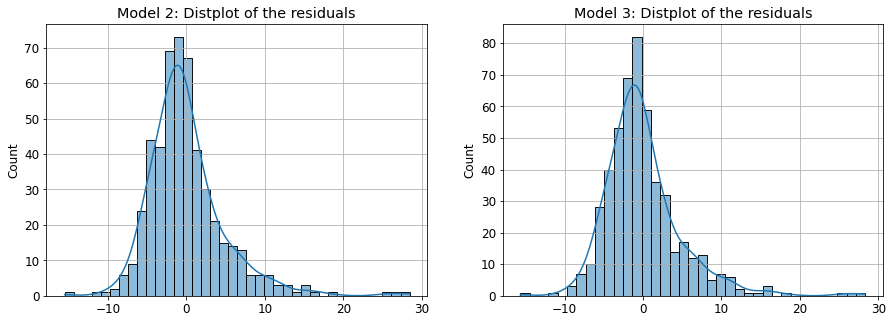

In [24]:
f,a =  plt.subplots(1,2, sharex=True, sharey=False, squeeze=False, figsize=(15,5))

#Plotting the distplot and the boxplot of the residuals for model 3

plot_0 = sns.histplot(model2.resid, ax=a[0][0], kde=True)
a[0][0].set_title('Model 2: Distplot of the residuals')

plot_1 = sns.histplot(model3.resid, ax=a[0][1], kde=True)
a[0][1].set_title('Model 3: Distplot of the residuals')
plt.show()

___

### With the above feature engineering method we can take 9 statistically significant variables to build model on Predictive approach

## Predictive Approach

In [25]:
# Import dependencies
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [26]:
lr = LinearRegression()

In [27]:
X = bos.drop(['avg_house_price','age','industrial_perc'],axis = 1)
Y = bos.avg_house_price

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [29]:
X_train.head()

,crime_rate,close_to_charles_river,nitric_oxide,avg_num_rooms,dist_frm_employment_center,pupil_teacher_ratio,perc_low_income_group
13,0.62976,0,0.538,5.949,4.7075,21.0,8.26
61,0.17171,0,0.453,5.966,6.8185,19.7,14.44
377,9.82349,0,0.671,6.794,1.3580,20.2,21.24
39,0.02763,0,0.428,6.595,5.4011,18.3,4.32
365,4.55587,0,0.718,3.561,1.6132,20.2,7.12


In [30]:
X_test.head()

,crime_rate,close_to_charles_river,nitric_oxide,avg_num_rooms,dist_frm_employment_center,pupil_teacher_ratio,perc_low_income_group
307,0.04932,0,0.472,6.849,3.1827,18.4,7.53
343,0.02543,0,0.484,6.696,5.7321,17.6,7.18
47,0.22927,0,0.448,6.030,5.6894,17.9,18.80
67,0.05789,0,0.409,5.878,6.4980,18.9,8.10
362,3.67822,0,0.770,5.362,2.1036,20.2,10.19


In [31]:
Y_train.head()

13     20.4
61     16.0
377    13.3
39     30.8
365    27.5
Name: avg_house_price, dtype: float64

In [32]:
Y_test.head()

307    28.2
343    23.9
47     16.6
67     22.0
362    20.8
Name: avg_house_price, dtype: float64

In [33]:
X.columns

Index(['crime_rate', 'close_to_charles_river', 'nitric_oxide', 'avg_num_rooms',
       'dist_frm_employment_center', 'pupil_teacher_ratio',
       'perc_low_income_group'],
      dtype='object')

In [34]:
model_1 = lr.fit(X_train[['crime_rate', 'close_to_charles_river', 'nitric_oxide', 'avg_num_rooms',
       'dist_frm_employment_center', 'pupil_teacher_ratio', 'perc_low_income_group']], Y_train)

In [35]:
#Training Data Prediction
model_1_pred_train = model_1.predict(X_train[['crime_rate', 'close_to_charles_river', 'nitric_oxide', 'avg_num_rooms',
       'dist_frm_employment_center', 'pupil_teacher_ratio', 'perc_low_income_group']])

In [36]:
#Test Data Prediction
model_1_pred_test = model_1.predict(X_test[['crime_rate', 'close_to_charles_river', 'nitric_oxide', 'avg_num_rooms',
       'dist_frm_employment_center', 'pupil_teacher_ratio', 'perc_low_income_group']])

In [37]:
print('Training Data RMSE of model_1:',metrics.mean_squared_error(Y_train,model_1_pred_train,squared=False))


Training Data RMSE of model_1: 5.028039513595206


In [38]:
print('Test Data RMSE of model_1:',metrics.mean_squared_error(Y_test,model_1_pred_test,squared=False))

Test Data RMSE of model_1: 4.6316421345004635


<AxesSubplot:xlabel='avg_house_price'>

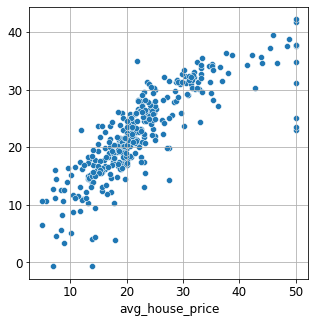

In [39]:
sns.scatterplot(x = Y_train, y = model_1_pred_train)

<AxesSubplot:xlabel='avg_house_price'>

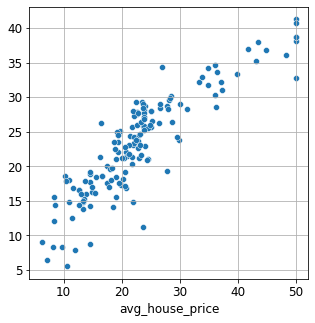

In [40]:
sns.scatterplot(x = Y_test, y = model_1_pred_test)

In [41]:
# Step 9: Calculate R-squared and Adjusted R-squared manually
r2 = model_1.score(X_test, Y_test)

# Calculate Adjusted R-squared
n = X_test.shape[0]  # Number of data points
p = X_test.shape[1]  # Number of features (predictors)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Adjusted R-squared using sklearn:", adj_r2)

Adjusted R-squared using sklearn: 0.7545682658770744
